# Procesamiento de Lenguaje Natural - **Clasificación Multi-etiqueta**

Esta notebook presenta ejemplos de los diferentes aspectos relacionados con la clasificación multi-etiqueta vistas en clase.

La clasificación tradicional simple-etiqueta se ocupa de aprender de un conjunto de ejemplos que tienen asociada una etiqueta única l de un conjunto de L etiquetas disjuntas, |L| > 1.

- Si |L| = 2, entonces el problema de aprendizaje se denomina problema de clasificación binaria (o filtrado en el caso de datos textuales y web)
- Si |L| > 2, entonces se denomina problema de clasificación multi-clase.

Cuando a los ejemplos se les asocia un conjunto de etiquetas Y ⊆ L, estamos ante un problema multi-etiqueta.

In [ ]:
pip install scikit-multilearn

# Conjunto de plots de películas con sus géneros asociados

Movie Genre from its Poster: 
Predicting the Genre of the movie by analyzing its poster

https://www.kaggle.com/neha1703/movie-genre-from-its-poster

In [ ]:
import numpy as np 
import pandas as pd 
from scipy import misc
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?export=download&id=1MkSzqrYm4T2Qh2p2UewT0PPXY5zouEyh'
data = pd.read_csv(url,encoding="ISO-8859-1")
data

,Sci-Fi,Crime,Romance,Animation,Music,Comedy,War,Horror,Film-Noir,Adventure,News,Western,Thriller,Adult,Mystery,Short,Talk-Show,Drama,Action,Documentary,Musical,History,Family,Reality-TV,Fantasy,Game-Show,Sport,Biography,-,--,1,10,1984,1985,1986,1987,1988,1989,1990,1991,...,waiting,wanted,war,watch,water,ways,wealthy,wedding,week,west,western,white,whos,wife,wild,william,win,winning,wins,witness,woman,women,wont,woods,word,words,work,working,works,world,worlds,worse,writer,wrong,year,years,york,young,younger,youth
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4997,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


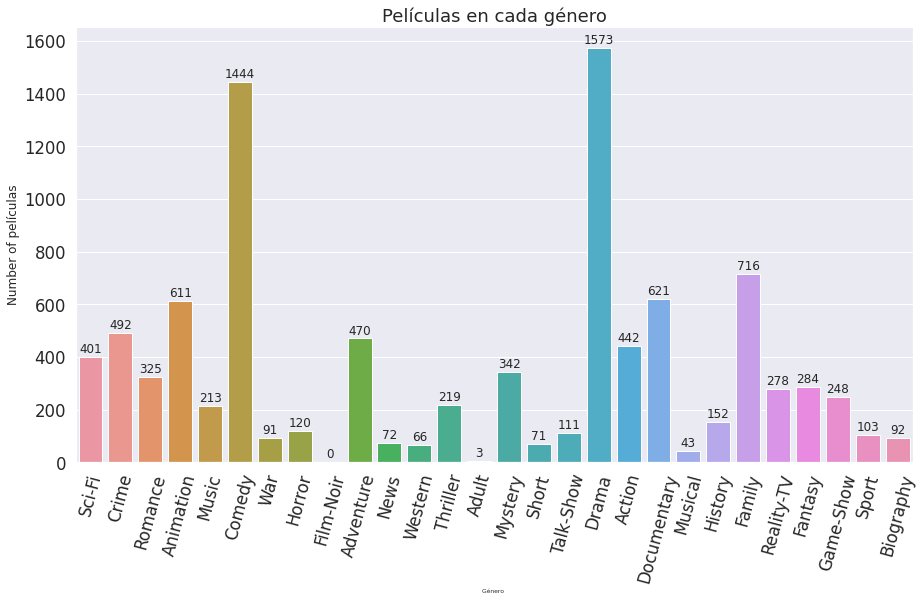

In [ ]:
import seaborn as sns

sns.set(font_scale = 1.5)
plt.figure(figsize=(15,8))

all_columns = list(data.columns.values)
categories = all_columns[:28]
ax= sns.barplot(categories, data.iloc[:,:28].sum().values)

plt.title("Películas en cada género", fontsize=18)
plt.ylabel('Number of películas', fontsize=12)
plt.xlabel('Género ', fontsize=6)

#adding the text labels
rects = ax.patches
labels = data.iloc[:,:28].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.show()

En esta notebook estamos trabajando con clasificación multi-etiqueta (o multi-label), con lo que cada ejemplo puede tener 1 o más labels. El siguiente gráfico muestra la cantidad de películas una cantidad determinada de géneros asocidos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


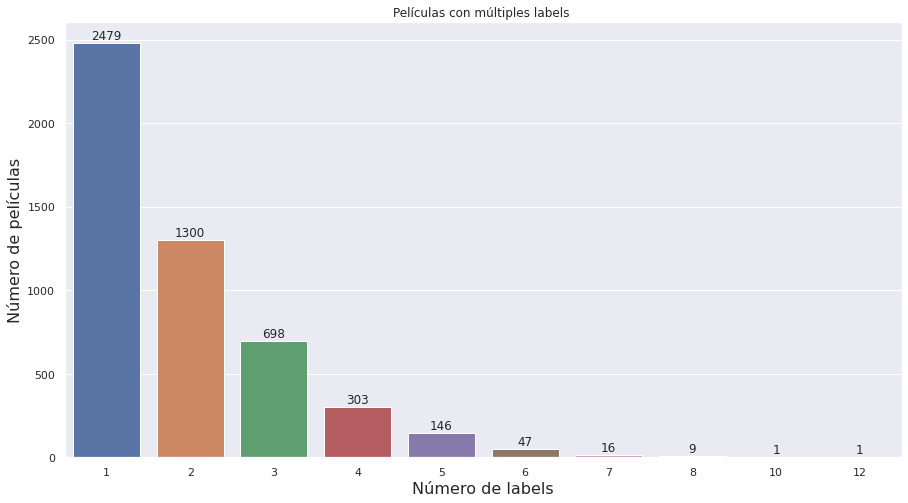

In [ ]:
rowSums = data.iloc[:,:28].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]

sns.set(font_scale = 1)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Películas con múltiples labels ")
plt.ylabel('Número de películas', fontsize=16)
plt.xlabel('Número de labels', fontsize=16)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
#particionamos los datos en training y testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.25, shuffle=True)

X_train = train.iloc[:,28:]
X_test = test.iloc[:,28:]

y_train = train.iloc[:,:28]
y_test = test.iloc[:,:28]

## **Multi-Label Classification**

### Multiple Binary Classifications - (One Vs Rest Classifier)

Esta estrategia consiste en aprender un clasificador por clase, donde los ejemplos de esa se consideran ejemplos positivos y todos los demás ejemplos negativos.

En la clasificación multi-label:
- Accuracy se refiere a *subset accuracy*, el conjunto de labels predichos para un ejemplo debe coincidir exactamente los labels en el ground truth.
- Hamming loss es la fracción de labels que se predijeron incorrectamente.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import hamming_loss

# Se crea el pipeline para aplicar logistic regression y OneVsRestClassifier
clf = Pipeline([
                ('onevsrest', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print('Subset Accuracy {}'.format(accuracy_score(y_test, prediction)))
print('Hamming Loss {}'.format(hamming_loss(y_test, prediction)))
print("------------------")
print("\n")
for category in categories[:5]:
    print('**Procesando películas de {} ...**'.format(category))
    
    clf.fit(X_train, y_train[category])
    
    prediction = clf.predict(X_test)


    print('Accuracy {}'.format(accuracy_score(y_test[category], prediction)))
    print('Precision {}'.format(precision_score(y_test[category], prediction)))
    print('Recall {}'.format(recall_score(y_test[category], prediction)))
    print('F1 {}'.format(f1_score(y_test[category], prediction)))
    print("------------------")

Subset Accuracy 0.0432
Hamming Loss 0.08077142857142858
------------------




NameError: ignored

### Multiple Binary Classifications - (Binary Relevance)

Binary Relevance es un enfoque de transformación que descompone la tarea de aprendizaje multi-label en un conjunto de tareas independientes binarias (una por label) y entre un clasificador para cada una de ellas.

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB

classifier = BinaryRelevance(MultinomialNB())
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print('Accuracy {}'.format(accuracy_score(y_test, predictions)))
print('Hamming Loss {}'.format(hamming_loss(y_test, predictions)))
print("\n")

Accuracy 0.0616
Hamming Loss 0.08474285714285715




### Classifier Chains (CC)

Classifier Chains es un método de transformación que mantiene eficiencia de Binary Relevance, pero toma en cuenta ciertas dependencias entre las etiquetas. Para ello, genera L clasificadores binarios, pero están vinculados de tal manera que el espacio de características de cada eslabón de la cadena se amplía con las etiquetas de todos los enlaces anteriores.



In [ ]:
from skmultilearn.problem_transform import ClassifierChain

classifier = ClassifierChain(MultinomialNB())

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print('Accuracy {}'.format(accuracy_score(y_test, predictions)))
print('Hamming Loss {}'.format(hamming_loss(y_test, predictions)))
print("\n")

Accuracy 0.0656
Hamming Loss 0.09045714285714286




### LabelPowerset (LP)

LabelPowerset es un método de transformación que translada el problema a uno multi-clase con 1 classificador multi-clase entrenado con todas las combinaciones únicas de etiquetas en los datos de entrenamiento.

In [ ]:
from skmultilearn.problem_transform import LabelPowerset

classifier = LabelPowerset(MultinomialNB())

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)


print('Accuracy {}'.format(accuracy_score(y_test, predictions)))
print('Hamming Loss {}'.format(hamming_loss(y_test, predictions)))
print("\n")

Accuracy 0.124
Hamming Loss 0.08474285714285715




### MLkNN

Adaptación del algoritmo tradicional de vecinos más cercanos k-NN. Para cada instancia nueva, se identifican sus K vecinos más cercanos en el conjunto de entrenamiento y, en función de la información estadística obtenida de los conjuntos de etiquetas de estas instancias vecinas, se utiliza el principio de máximo a posteriori (MAP) para determinar el conjunto de etiquetas para la nueva instancia.

In [ ]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

classifier = MLkNN(k=10)

X_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
X_test = lil_matrix(X_test).toarray()

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print('Accuracy {}'.format(accuracy_score(y_test, predictions)))
print('Hamming Loss {}'.format(hamming_loss(y_test, predictions)))
print("\n")

Accuracy 0.0296
Hamming Loss 0.0752


